In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score,roc_curve,accuracy_score,make_scorer,auc

In [2]:
def fit_classifier(model, X, y, parameters=None, scorer_metrics=None):

    grid_obj = GridSearchCV(estimator=model, param_grid=parameters,
                            scoring=make_scorer(scorer_metrics), cv=5)

    grid_fit = grid_obj.fit(X, y)

    model_estimator = grid_fit.best_estimator_

    model_estimator.fit(X, y)
    y_pred = model_estimator.predict(X)

    print("\n")
    print("\nModel performance on training set\n------------------------")
    print("Final accuracy score on the training data: {:.4f}".format(
        accuracy_score(y, y_pred)))
    print("Final precision score on training data: {:.4f}".format(
        precision_score(y, y_pred)))
    print("Final Recall score on training data: {:.4f}".format(
        recall_score(y, y_pred)))
    print("Final ROC AUC score on training data: {:.4f}".format(
        roc_auc_score(y, y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))

    return model_estimator

In [3]:
# создаём функцию для построения графика ROC-AUC 
def roc_auc_plot(model, X, y, label=None):

    y_score = model.predict_proba(X)[:, 1]

    roc = roc_curve(y, y_score)

    plt.plot(roc[0], roc[1], label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    roc_score = auc(roc[0], roc[1])
    print('AUC score of %s is %.4f.' % (label, roc_score))

In [4]:
def plot_roc_curve(y, pred):
    roc_score = roc_auc_score(y, pred)

    fpr, tpr, threshold = roc_curve(y, pred)

    plt.figure(figsize=(6, 5))
    lw = 2
    plt.title('ROC-AUC Curve, %2.1f%%' % (100*roc_score), fontsize=14)
    plt.plot(fpr, tpr, color='darkorange', lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.savefig("roc_auc_final.png")
    plt.show()

In [5]:
df_2018 = pd.read_csv('./samples/y2018.csv')
df_2019 = pd.read_csv('./samples/y2019.csv')
df_2020 = pd.read_csv('./samples/y2020.csv')
df_2021 = pd.read_csv('./samples/y2021.csv')
df_2022 = pd.read_csv('./samples/y2022.csv')

In [6]:
df_2018.head()

,system:index,m_10,m_11,m_4,m_5,m_6,m_7,m_8,m_9,name,state,year,.geo
0,2_0_0,0.771702,0.256970,0.589903,0.798264,0.826473,0.489460,0.842676,0.785188,161_2019,1,y2018,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,2_1_0,0.555886,0.095696,0.228813,0.646295,0.833649,0.734022,0.794393,0.665546,43E_2019,1,y2018,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,2_2_0,0.184525,0.018129,0.263804,0.809224,0.830125,0.644455,0.776864,0.785586,313_2020,0,y2018,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,2_3_0,0.594700,0.369903,0.387250,0.841079,0.897446,0.865163,0.878579,0.802358,134_2019,1,y2018,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,2_4_0,0.612999,0.181587,0.400805,0.825996,0.845218,0.597657,0.876725,0.100219,77E_2019,1,y2018,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


In [7]:
def prepare_df(data):
    df = data.copy()
    del df['system:index']
    del df['name']
    del df['year']
    del df['.geo']
    return df

In [8]:
df_2018=prepare_df(df_2018)
df_2019=prepare_df(df_2019)
df_2020=prepare_df(df_2020)
df_2021=prepare_df(df_2021)
df_2022=prepare_df(df_2022)

In [9]:
df_2018.head()

,m_10,m_11,m_4,m_5,m_6,m_7,m_8,m_9,state
0,0.771702,0.256970,0.589903,0.798264,0.826473,0.489460,0.842676,0.785188,1
1,0.555886,0.095696,0.228813,0.646295,0.833649,0.734022,0.794393,0.665546,1
2,0.184525,0.018129,0.263804,0.809224,0.830125,0.644455,0.776864,0.785586,0
3,0.594700,0.369903,0.387250,0.841079,0.897446,0.865163,0.878579,0.802358,1
4,0.612999,0.181587,0.400805,0.825996,0.845218,0.597657,0.876725,0.100219,1


In [10]:
frames = [df_2018, df_2019, df_2020,df_2021,df_2022]
result_df = pd.concat(frames)

In [11]:
result_df.describe()

,m_10,m_11,m_4,m_5,m_6,m_7,m_8,m_9,state
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000
mean,-0.993550,-4.289760,0.288312,0.577447,0.716622,0.412513,0.649406,0.567419,0.7302
std,11.971050,20.875641,0.129722,0.253050,0.214007,4.501124,0.186255,0.278829,0.4439
min,-100.000000,-100.000000,0.027547,0.014791,0.062605,-100.000000,0.109643,0.012163,0.0000
25%,0.213617,0.023413,0.224581,0.404069,0.639998,0.447294,0.512794,0.503917,0.0000
50%,0.534104,0.228649,0.291175,0.670420,0.813716,0.687461,0.701702,0.678640,1.0000
75%,0.635525,0.426083,0.377113,0.776165,0.861820,0.794964,0.801592,0.768782,1.0000
max,0.897895,0.784954,0.746556,0.922326,0.918665,0.936101,0.915713,0.888346,1.0000


In [12]:
corr = result_df.corr()
c = corr.abs().unstack()
c[c == 1] = 0
c = c.sort_values(ascending=False).drop_duplicates()
tmp = c.head(10)
tmp.sort_values(ascending=True)
tmp

m_9  m_5    0.805674
m_6  m_9    0.804447
m_4  m_9    0.787768
m_5  m_6    0.776499
m_4  m_5    0.764479
m_9  m_8    0.720281
m_6  m_4    0.708387
m_8  m_6    0.659721
m_5  m_8    0.646570
m_4  m_8    0.593233
dtype: float64

In [13]:
# проверка на баланс классов - классы сбалансированы
result_df["state"].value_counts()

1    3651
0    1349
Name: state, dtype: int64

In [14]:
unused = result_df[result_df["state"] == 0]
used = result_df[result_df["state"] ==  1]
print(unused.shape)
print(used.shape)

(1349, 9)
(3651, 9)


In [15]:
from sklearn.utils import resample
used_downsample = resample(used,
             replace=True,
             n_samples=len(unused),
             random_state=42)

print(used_downsample.shape)

(1349, 9)


In [16]:
data_downsampled = pd.concat([used_downsample, unused])

In [17]:
print(data_downsampled["state"].value_counts())

1    1349
0    1349
Name: state, dtype: int64


In [18]:
# разделяем искомую переменную от всех данных
X = data_downsampled.drop(columns=['state'])
y = data_downsampled['state']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=232)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=232)

In [20]:
# найдем и построим наилучшую модельмодель для DecisionTree
parameters_DT = {'max_depth': [3, 5, 7],
                 'min_samples_leaf': [2, 3, 4],
                 'min_samples_split': [2, 3, 4]}

model_DT = fit_classifier(DecisionTreeClassifier(random_state=44), X_train, y_train,
                          parameters=parameters_DT, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.8288
Final precision score on training data: 0.7857
Final Recall score on training data: 0.9111
Final ROC AUC score on training data: 0.8276


The best parameters are: DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=44)


In [21]:
# найдем и построим наилучшую модель для random forest
# Create the parameters list
parameters_RF = {'max_depth': [2, 5, 7, 10], 'min_samples_leaf': [
    2, 3, 5, 7, 10], 'min_samples_split': [2, 3, 5, 10]}

model_RF = fit_classifier(RandomForestClassifier(random_state=18), X_train, y_train,
                          parameters=parameters_RF, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.9604
Final precision score on training data: 0.9610
Final Recall score on training data: 0.9610
Final ROC AUC score on training data: 0.9604


The best parameters are: RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=18)


AUC score of Random Forest is 0.9630.
AUC score of Decision Tree is 0.8848.


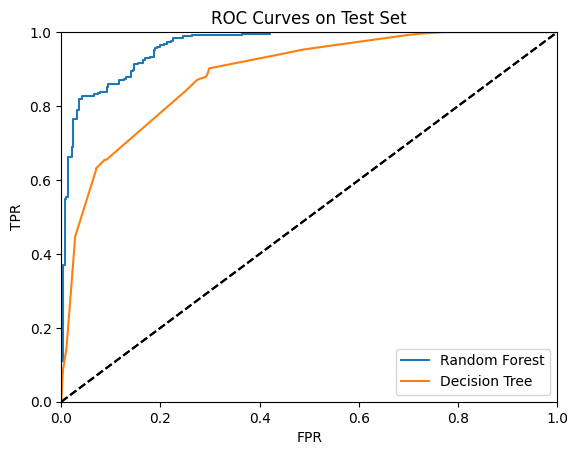

In [24]:
roc_auc_plot(model_RF, X_test, y_test, label='Random Forest')
roc_auc_plot(model_DT, X_test, y_test, label='Decision Tree')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')
plt.show()

AUC score of Random Forest is 0.9324.
AUC score of Decision Tree is 0.8682.


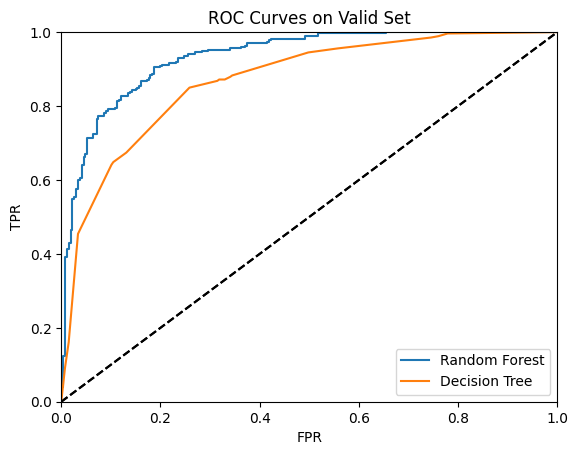

In [23]:
roc_auc_plot(model_RF, X_val, y_val, label='Random Forest')
roc_auc_plot(model_DT, X_val, y_val, label='Decision Tree')
plt.title('ROC Curves on Valid Set')
plt.legend(loc='lower right')
plt.show()

In [25]:
def show_confusion_matrix(X, y, model, threshold=0.5):
    pred = model.predict_proba(X)[:, 1]
    pred = [1 if p >= threshold else 0 for p in pred]
    cm = pd.DataFrame(confusion_matrix(y, pred),
                      index=["actual 0", "actual 1"], columns=["pred 0", "pred 1"])
    print("Threshold = %.2f" % threshold)
    print("Accuracy score: %.1f%%" % (100 * accuracy_score(y, pred)))
    print("Confusion matrix:")
    display(cm)


show_confusion_matrix(X, y, model_RF, threshold=.7)

Threshold = 0.70
Accuracy score: 88.7%
Confusion matrix:


,pred 0,pred 1
actual 0,1326,23
actual 1,283,1066


In [26]:
valid_df = pd.read_csv('./samples/y2019.csv')
valid_df.head()

,system:index,m_10,m_11,m_4,m_5,m_6,m_7,m_8,m_9,name,state,year,.geo
0,2_0_0,0.389966,0.111933,0.455665,0.813514,0.846371,0.841692,0.778846,0.710468,26_2020,1,y2019,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,2_1_0,0.686797,-0.009949,0.189241,0.372506,0.419155,0.665970,0.682539,0.709550,284_2020,0,y2019,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,2_2_0,0.538462,0.574201,0.183650,0.313747,0.671279,0.738791,0.714177,0.587363,39k_2019,0,y2019,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,2_3_0,0.573306,0.299102,0.291387,0.479468,0.860298,0.528121,0.637177,0.628159,124_2019,1,y2019,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,2_4_0,0.588354,0.558747,0.360682,0.449735,0.757956,0.763657,0.731141,0.537086,53_2020,1,y2019,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


In [27]:
valid_df=prepare_df(valid_df)

In [28]:
X_final = valid_df.drop(columns=['state'])

In [29]:
X_final.head()

,m_10,m_11,m_4,m_5,m_6,m_7,m_8,m_9
0,0.389966,0.111933,0.455665,0.813514,0.846371,0.841692,0.778846,0.710468
1,0.686797,-0.009949,0.189241,0.372506,0.419155,0.665970,0.682539,0.709550
2,0.538462,0.574201,0.183650,0.313747,0.671279,0.738791,0.714177,0.587363
3,0.573306,0.299102,0.291387,0.479468,0.860298,0.528121,0.637177,0.628159
4,0.588354,0.558747,0.360682,0.449735,0.757956,0.763657,0.731141,0.537086


In [30]:
pred = model_RF.predict(X_final)

#pred = pd.DataFrame({id_col: ind_col, "prediction": pred})
#pred.head()

In [31]:
print("Accuracy score: %.1f%%" % (100 * accuracy_score(valid_df['state'], pred)))

Accuracy score: 87.1%
